## 第6章: 機械学習
本章では，Fabio Gasparetti氏が公開しているNews Aggregator Data Setを用い，ニュース記事の見出しを「ビジネス」「科学技術」「エンターテイメント」「健康」のカテゴリに分類するタスク（カテゴリ分類）に取り組む．

#### 50. データの入手・整形
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

まずは、指定のデータをダウンロードします。

In [1]:
%load_ext lab_black

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2021-12-11 11:54:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  1.66MB/s    in 24s     

2021-12-11 11:54:34 (1.17 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [3]:
# 行数の確認
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [4]:
# 先頭10行の確認
!head -10 ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [5]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

続いて、pandasのデータフレームで読込み、問題文の指示に従いデータを作成していきます。
データの分割にはscikit-learnのtrain_test_splitを利用しています。その際stratifyオプションを利用すると、指定したカラムの構成比が分割後の各データで等しくなるように分割されます。ここでは、分類の目的変数であるCATEGORYを指定し、データごとに偏りが生じないようにしています。

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv(
    "./newsCorpora_re.csv",
    header=None,
    sep="\t",
    names=[
        "ID",
        "TITLE",
        "URL",
        "PUBLISHER",
        "CATEGORY",
        "STORY",
        "HOSTNAME",
        "TIMESTAMP",
    ],
)

# データの抽出
df = df.loc[
    df["PUBLISHER"].isin(
        ["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"]
    ),
    ["TITLE", "CATEGORY"],
]

# データの分割
train, valid_test = train_test_split(
    df, test_size=0.2, shuffle=True, random_state=123, stratify=df["CATEGORY"]
)
valid, test = train_test_split(
    valid_test,
    test_size=0.5,
    shuffle=True,
    random_state=123,
    stratify=valid_test["CATEGORY"],
)

# データの保存
train.to_csv("./train.txt", sep="\t", index=False)
valid.to_csv("./valid.txt", sep="\t", index=False)
test.to_csv("./test.txt", sep="\t", index=False)

# 事例数の確認
print("【学習データ】")
print(train["CATEGORY"].value_counts())
print("【検証データ】")
print(valid["CATEGORY"].value_counts())
print("【評価データ】")
print(test["CATEGORY"].value_counts())

【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


#### 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

今回は、記事の見出しをスペースで分割した単語群を対象にTF-IDFを算出し、その値を特徴量として利用することにします。また、1単語(uni-gram)だけでなく連続する2単語(bi-gram)についてもTF-IDFを計算します。
なお、上記を計算するにあたり、テキストの前処理として、①記号をスペースに置換、②アルファベットの小文字化、③数字列を0に置換、の3つの処理を行っています。

In [7]:
import re
import string


def preprocessing(text):
    table = str.maketrans(string.punctuation, " " * len(string.punctuation))
    text = text.translate(table)  # 記号をスペースに置換
    text = text.lower()  # 小文字化
    text = re.sub("[0-9]+", "0", text)  # 数字列を0に置換

    return text

In [8]:
# データの再結合
df = pd.concat([train, valid, test], axis=0)
df.reset_index(drop=True, inplace=True)  # indexを振りなおす

# 前処理の実施
df["TITLE"] = df["TITLE"].map(lambda x: preprocessing(x))

print(df.head())

                                               TITLE CATEGORY
0  refile update 0 european car sales up for sixt...        b
1  amazon plans to fight ftc over mobile app purc...        t
2  kids still get codeine in emergency rooms desp...        m
3  what on earth happened between solange and jay...        e
4  nato missile defense is flight tested over hawaii        b


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# データの分割
train_valid = df[: len(train) + len(valid)]
test = df[len(train) + len(valid) :]

# TfidfVectorizer
vec_tfidf = TfidfVectorizer(
    min_df=10, ngram_range=(1, 2)
)  # ngram_rangeでTF-IDFを計算する単語の長さを指定

# ベクトル化
X_train_valid = vec_tfidf.fit_transform(train_valid["TITLE"])  # testの情報は使わない
X_test = vec_tfidf.transform(test["TITLE"])

# ベクトルをデータフレームに変換
X_train_valid = pd.DataFrame(
    X_train_valid.toarray(), columns=vec_tfidf.get_feature_names()
)
X_test = pd.DataFrame(X_test.toarray(), columns=vec_tfidf.get_feature_names())

# データの分割
X_train = X_train_valid[: len(train)]
X_valid = X_train_valid[len(train) :]

# データの保存
X_train.to_csv("./X_train.txt", sep="\t", index=False)
X_valid.to_csv("./X_valid.txt", sep="\t", index=False)
X_test.to_csv("./X_test.txt", sep="\t", index=False)

print(X_train.head())

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


    0m  0million  0nd   0s  0st  0th  0th birthday   aa  aaliyah  abbvie  ...  \
0  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
1  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
2  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
3  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   
4  0.0       0.0  0.0  0.0  0.0  0.0           0.0  0.0      0.0     0.0  ...   

   young  your  your mother   yr  yr high  yuan  zac  zac efron  zendaya  zone  
0    0.0   0.0          0.0  0.0      0.0   0.0  0.0        0.0      0.0   0.0  
1    0.0   0.0          0.0  0.0      0.0   0.0  0.0        0.0      0.0   0.0  
2    0.0   0.0          0.0  0.0      0.0   0.0  0.0        0.0      0.0   0.0  
3    0.0   0.0          0.0  0.0      0.0   0.0  0.0        0.0      0.0   0.0  
4    0.0   0.0          0.0  0.0      0.0   0.0  0.0        0.0      0.0   0.0  

[5 rows x 2815 columns]


#### 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [10]:
from sklearn.linear_model import LogisticRegression

# モデルの学習
lg = LogisticRegression(random_state=123, max_iter=10000)
lg.fit(X_train, train["CATEGORY"])

LogisticRegression(max_iter=10000, random_state=123)

#### 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

51のテキスト前処理からTF-IDFによるベクトル化までを経たデータセットを入力とする関数を定義します。

In [11]:
import numpy as np


def score_lg(lg, X):
    return [np.max(lg.predict_proba(X), axis=1), lg.predict(X)]

In [12]:
train_pred = score_lg(lg, X_train)
test_pred = score_lg(lg, X_test)

print(train_pred)

[array([0.84029011, 0.67902206, 0.55638169, ..., 0.86051603, 0.61358408,
       0.90828212]), array(['b', 't', 'm', ..., 'b', 'm', 'e'], dtype=object)]


#### 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [13]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train["CATEGORY"], train_pred[1])
test_accuracy = accuracy_score(test["CATEGORY"], test_pred[1])
print(f"正解率（学習データ）：{train_accuracy:.3f}")
print(f"正解率（評価データ）：{test_accuracy:.3f}")

正解率（学習データ）：0.927
正解率（評価データ）：0.885


#### 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

混同行列もscikit-learnを用いて計算します。
さらに、算出した混同行列をseabornを用いて可視化します。

[[4344   93    8   56]
 [  52 4173    2    8]
 [  96  125  494   13]
 [ 192  133    7  888]]


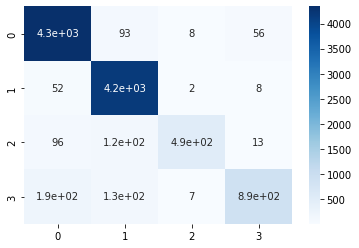

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 学習データ
train_cm = confusion_matrix(train["CATEGORY"], train_pred[1])
print(train_cm)
sns.heatmap(train_cm, annot=True, cmap="Blues")
plt.show()

[[528  20   2  13]
 [ 12 516   1   1]
 [ 11  26  52   2]
 [ 38  26   1  87]]


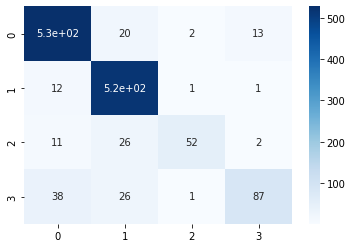

In [15]:
# 評価データ
test_cm = confusion_matrix(test["CATEGORY"], test_pred[1])
print(test_cm)
sns.heatmap(test_cm, annot=True, cmap="Blues")
plt.show()

#### 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score


def calculate_scores(y_true, y_pred):
    # 適合率
    precision = precision_score(
        test["CATEGORY"], test_pred[1], average=None, labels=["b", "e", "t", "m"]
    )  # Noneを指定するとクラスごとの精度をndarrayで返す
    precision = np.append(
        precision, precision_score(y_true, y_pred, average="micro")
    )  # 末尾にマイクロ平均を追加
    precision = np.append(
        precision, precision_score(y_true, y_pred, average="macro")
    )  # 末尾にマクロ平均を追加

    # 再現率
    recall = recall_score(
        test["CATEGORY"], test_pred[1], average=None, labels=["b", "e", "t", "m"]
    )
    recall = np.append(recall, recall_score(y_true, y_pred, average="micro"))
    recall = np.append(recall, recall_score(y_true, y_pred, average="macro"))

    # F1スコア
    f1 = f1_score(
        test["CATEGORY"], test_pred[1], average=None, labels=["b", "e", "t", "m"]
    )
    f1 = np.append(f1, f1_score(y_true, y_pred, average="micro"))
    f1 = np.append(f1, f1_score(y_true, y_pred, average="macro"))

    # 結果を結合してデータフレーム化
    scores = pd.DataFrame(
        {"適合率": precision, "再現率": recall, "F1スコア": f1},
        index=["b", "e", "t", "m", "マイクロ平均", "マクロ平均"],
    )

    return scores

In [17]:
print(calculate_scores(test["CATEGORY"], test_pred[1]))

             適合率       再現率     F1スコア
b       0.896435  0.937833  0.916667
e       0.877551  0.973585  0.923077
t       0.844660  0.572368  0.682353
m       0.928571  0.571429  0.707483
マイクロ平均  0.885479  0.885479  0.885479
マクロ平均   0.886804  0.763804  0.807395


#### 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [18]:
features = X_train.columns.values
index = [i for i in range(1, 11)]
for c, coef in zip(lg.classes_, lg.coef_):
    print(f"【カテゴリ】{c}")
    best10 = pd.DataFrame(
        features[np.argsort(coef)[::-1][:10]], columns=["重要度上位"], index=index
    ).T
    worst10 = pd.DataFrame(
        features[np.argsort(coef)[:10]], columns=["重要度下位"], index=index
    ).T
    display(pd.concat([best10, worst10], axis=0))
    print("\n")

【カテゴリ】b


,1,2,3,4,5,6,7,8,9,10
重要度上位,bank,fed,china,ecb,stocks,euro,obamacare,oil,yellen,dollar
重要度下位,video,ebola,the,her,and,she,apple,google,star,microsoft




【カテゴリ】e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,chris,her,movie,star,film,paul,he,wedding,she
重要度下位,us,update,google,study,china,gm,ceo,facebook,apple,says




【カテゴリ】m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,study,cancer,drug,mers,fda,cases,cdc,could,cigarettes
重要度下位,facebook,gm,ceo,apple,bank,deal,google,sales,climate,twitter




【カテゴリ】t


,1,2,3,4,5,6,7,8,9,10
重要度上位,google,facebook,apple,microsoft,climate,gm,nasa,tesla,comcast,heartbleed
重要度下位,stocks,fed,her,percent,drug,american,cancer,ukraine,still,shares


#### 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [19]:
from tqdm import tqdm

result = []
for C in tqdm(np.logspace(-5, 4, 10, base=10)):
    # モデルの学習
    lg = LogisticRegression(random_state=123, max_iter=1000, C=C)
    lg.fit(X_train, train["CATEGORY"])

    # 予測値の取得
    train_pred = score_lg(lg, X_train)
    valid_pred = score_lg(lg, X_valid)
    test_pred = score_lg(lg, X_test)

    # 正解率の算出
    train_accuracy = accuracy_score(train["CATEGORY"], train_pred[1])
    valid_accuracy = accuracy_score(valid["CATEGORY"], valid_pred[1])
    test_accuracy = accuracy_score(test["CATEGORY"], test_pred[1])

    # 結果の格納
    result.append([C, train_accuracy, valid_accuracy, test_accuracy])

 90%|█████████ | 9/10 [07:40<01:46, 106.84s/it]/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 10/10 [11:45<00:00, 70.55s/it] 


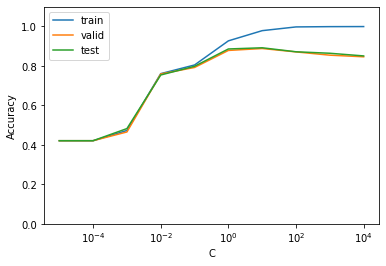

In [20]:
# 視覚化
result = np.array(result).T
plt.plot(result[0], result[1], label="train")
plt.plot(result[0], result[2], label="valid")
plt.plot(result[0], result[3], label="test")
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.xscale("log")
plt.xlabel("C")
plt.legend()
plt.show()

#### 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

ここでは、正則化の強さを指定するC、および、L1正則化とL2正則化のバランスを指定するl1_ratioを対象にパラメータ探索を行います。
また、最適化にはoptunaを用いています。

In [21]:
import optuna


# 最適化対象を関数で指定
def objective_lg(trial):
    # チューニング対象パラメータのセット
    l1_ratio = trial.suggest_uniform("l1_ratio", 0, 1)
    C = trial.suggest_loguniform("C", 1e-4, 1e4)

    # モデルの学習
    lg = LogisticRegression(
        random_state=123,
        max_iter=10000,
        penalty="elasticnet",
        solver="saga",
        l1_ratio=l1_ratio,
        C=C,
    )
    lg.fit(X_train, train["CATEGORY"])

    # 予測値の取得
    valid_pred = score_lg(lg, X_valid)

    # 正解率の算出
    valid_accuracy = accuracy_score(valid["CATEGORY"], valid_pred[1])

    return valid_accuracy

In [22]:
# 最適化
study = optuna.create_study(direction="maximize")
study.optimize(objective_lg, timeout=360)

# 結果の表示
print("Best trial:")
trial = study.best_trial
print("  Value: {:.3f}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-12-11 12:09:46,587] A new study created in memory with name: no-name-79fa2812-bb4e-4632-9b43-42dbb06e9769
[I 2021-12-11 12:10:31,807] Trial 0 finished with value: 0.8607784431137725 and parameters: {'l1_ratio': 0.22909349000589274, 'C': 0.48673662780667853}. Best is trial 0 with value: 0.8607784431137725.
[I 2021-12-11 12:11:38,694] Trial 1 finished with value: 0.8892215568862275 and parameters: {'l1_ratio': 0.07248830065163603, 'C': 4.096372204715555}. Best is trial 1 with value: 0.8892215568862275.
[I 2021-12-11 12:11:42,921] Trial 2 finished with value: 0.39595808383233533 and parameters: {'l1_ratio': 0.5877868603364524, 'C': 0.0009517749118544013}. Best is trial 1 with value: 0.8892215568862275.
[I 2021-12-11 12:12:21,046] Trial 3 finished with value: 0.8158682634730539 and parameters: {'l1_ratio': 0.951048949900587, 'C': 0.28156137558647887}. Best is trial 1 with value: 0.8892215568862275.
[I 2021-12-11 12:22:24,898] Trial 4 finished with value: 0.8712574850299402 and para

Best trial:
  Value: 0.889
  Params: 
    l1_ratio: 0.07248830065163603
    C: 4.096372204715555


In [23]:
# パラメータの設定
l1_ratio = trial.params["l1_ratio"]
C = trial.params["C"]

# モデルの学習
lg = LogisticRegression(
    random_state=123,
    max_iter=10000,
    penalty="elasticnet",
    solver="saga",
    l1_ratio=l1_ratio,
    C=C,
)
lg.fit(X_train, train["CATEGORY"])

# 予測値の取得
train_pred = score_lg(lg, X_train)
valid_pred = score_lg(lg, X_valid)
test_pred = score_lg(lg, X_test)

# 正解率の算出
train_accuracy = accuracy_score(train["CATEGORY"], train_pred[1])
valid_accuracy = accuracy_score(valid["CATEGORY"], valid_pred[1])
test_accuracy = accuracy_score(test["CATEGORY"], test_pred[1])

print(f"正解率（学習データ）：{train_accuracy:.3f}")
print(f"正解率（検証データ）：{valid_accuracy:.3f}")
print(f"正解率（評価データ）：{test_accuracy:.3f}")

正解率（学習データ）：0.961
正解率（検証データ）：0.889
正解率（評価データ）：0.895


今回はさらにXGBoostも試してみることにします。
なお、こちらはパラメータ探索は行わず、決め打ちのパラメータでモデルを学習しています。



In [24]:
import xgboost as xgb

params = {
    "objective": "multi:softmax",
    "num_class": 4,
    "eval_metric": "mlogloss",
    "colsample_bytree": 1.0,
    "colsample_bylevel": 0.5,
    "min_child_weight": 1,
    "subsample": 0.9,
    "eta": 0.1,
    "max_depth": 5,
    "gamma": 0.0,
    "alpha": 0.0,
    "lambda": 1.0,
    "num_round": 1000,
    "early_stopping_rounds": 50,
    "verbosity": 0,
}

# XGBoost用にフォーマット変換
category_dict = {"b": 0, "e": 1, "t": 2, "m": 3}
y_train = train["CATEGORY"].map(lambda x: category_dict[x])
y_valid = valid["CATEGORY"].map(lambda x: category_dict[x])
y_test = test["CATEGORY"].map(lambda x: category_dict[x])
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# モデルの学習
num_round = params.pop("num_round")
early_stopping_rounds = params.pop("early_stopping_rounds")
watchlist = [(dtrain, "train"), (dvalid, "eval")]
model = xgb.train(
    params,
    dtrain,
    num_round,
    evals=watchlist,
    early_stopping_rounds=early_stopping_rounds,
)

[0]	train-mlogloss:1.32709	eval-mlogloss:1.32675
[1]	train-mlogloss:1.27527	eval-mlogloss:1.27415
[2]	train-mlogloss:1.23122	eval-mlogloss:1.23033
[3]	train-mlogloss:1.19222	eval-mlogloss:1.19072
[4]	train-mlogloss:1.15730	eval-mlogloss:1.15568
[5]	train-mlogloss:1.12566	eval-mlogloss:1.12319
[6]	train-mlogloss:1.09730	eval-mlogloss:1.09517
[7]	train-mlogloss:1.07190	eval-mlogloss:1.06918
[8]	train-mlogloss:1.04904	eval-mlogloss:1.04648
[9]	train-mlogloss:1.02801	eval-mlogloss:1.02533
[10]	train-mlogloss:1.00858	eval-mlogloss:1.00581
[11]	train-mlogloss:0.99137	eval-mlogloss:0.98858
[12]	train-mlogloss:0.97566	eval-mlogloss:0.97245
[13]	train-mlogloss:0.96061	eval-mlogloss:0.95791
[14]	train-mlogloss:0.94701	eval-mlogloss:0.94425
[15]	train-mlogloss:0.93417	eval-mlogloss:0.93221
[16]	train-mlogloss:0.92194	eval-mlogloss:0.92048
[17]	train-mlogloss:0.91032	eval-mlogloss:0.90908
[18]	train-mlogloss:0.89992	eval-mlogloss:0.89889
[19]	train-mlogloss:0.89006	eval-mlogloss:0.88998
[20]	train

In [25]:
# 予測値の取得
train_pred = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
valid_pred = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
test_pred = model.predict(dtest, ntree_limit=model.best_ntree_limit)

# 正解率の算出
train_accuracy = accuracy_score(y_train, train_pred)
valid_accuracy = accuracy_score(y_valid, valid_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"正解率（学習データ）：{train_accuracy:.3f}")
print(f"正解率（検証データ）：{valid_accuracy:.3f}")
print(f"正解率（評価データ）：{test_accuracy:.3f}")

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


正解率（学習データ）：0.962
正解率（検証データ）：0.871
正解率（評価データ）：0.876
